## TOC:
* [Lab | Cleaning numerical data](#first-bullet)
* [Lab | Cleaning categorical data](#second-bullet)
* [Lab | Feature extraction](#third-bullet)


## Lab | Cleaning numerical data <a class="anchor" id="first-bullet"></a>

## Context

An auto insurance company has collected some data about its customers including their _demographics_, _education_, _employment_, _policy details_, _vehicle information_ on which insurance policy is, and _claim amounts_. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

**Some business Objectives**:

- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.


1. Import the necessary libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df



In [2]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')


3. First look at its main features (head, shape, info).



In [3]:
display(customer_df.shape)
display(customer_df.head())
display(customer_df.info())


(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

None

The data has no NaN values

4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)



In [4]:
customer_df.columns = customer_df.columns.str.replace(' ','_')
customer_df.columns = customer_df.columns.str.lower()
customer_df.columns


Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

5. Change effective to date column to datetime format.



In [5]:
customer_df['effective_to_date']=pd.to_datetime(customer_df['effective_to_date'])   #changing the type of the column to datetime 
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

6. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df



In [6]:
#We can say discrete vbles are the ones whose range is higher than 10

customer_num = customer_df._get_numeric_data()
customer_num.nunique()


customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [7]:
customer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [8]:
def cont_discr(df):
    discrete = []
    continuous = []
    for col in df:
        if df[col].nunique() <= 10:
            discrete.append(col)
        else:
            continuous.append(col)
    return discrete,continuous
# def cont_discr(df):
#     discrete = []
#     continuous = []
#     for col in df:
#         if df[col].nunique() <= 10:
#             discrete.append(col)
#         else:
#             continuous.append(col)
#     return customer_num[discrete],customer_num[continuous]

In [9]:
cont_discr(customer_num)


(['number_of_open_complaints', 'number_of_policies'],
 ['customer_lifetime_value',
  'income',
  'monthly_premium_auto',
  'months_since_last_claim',
  'months_since_policy_inception',
  'total_claim_amount'])

In [10]:
customer_num_dis = customer_num[['number_of_open_complaints', 'number_of_policies']]
customer_num_dis

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1
...,...,...
9129,0,2
9130,0,1
9131,3,2
9132,0,3


In [11]:
customer_num_con = customer_num[['customer_lifetime_value',
  'income',
  'monthly_premium_auto',
  'months_since_last_claim',
  'months_since_policy_inception',
  'total_claim_amount']]
customer_num_con 

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879
...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,198.234764
9130,3096.511217,21604,79,14,28,379.200000
9131,8163.890428,0,85,9,37,790.784983
9132,7524.442436,21941,96,34,3,691.200000


7. Plot a correlation matrix, comment what you see.



customer_lifetime_value and monthly_premium_auto are a bit correlated but not very strongly and also with total_claim_amount(0.4, 0.23)

total_claim_amount is also quite strongly correlated with monthly_premium_auto and negatively correlated with income, which makes sense, a higher income is less likely to make a claim.
                        
                        
The rest of columns are not significantly correlated 



<AxesSubplot:>

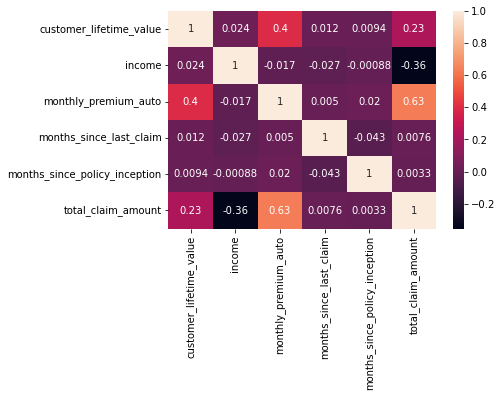

In [12]:
sns.heatmap(customer_num_con.corr(),annot=True)

8. Create a function to plot every discrete variable.  Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)



<Figure size 720x360 with 0 Axes>

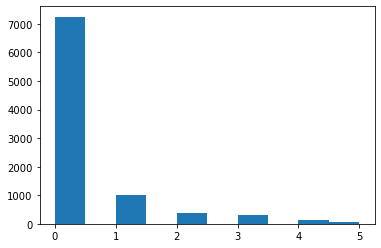

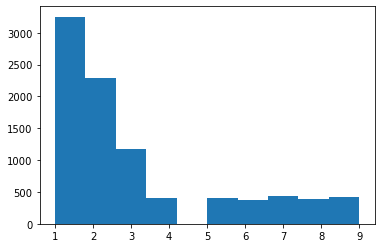

In [13]:
def plot_dis(df):
    plt.figure(figsize=(10,5))
    for i in df.columns:
        plt.figure()
        plt.hist(df[i])
        
plot_dis(customer_num_dis)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879
...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,198.234764
9130,3096.511217,21604,79,14,28,379.200000
9131,8163.890428,0,85,9,37,790.784983
9132,7524.442436,21941,96,34,3,691.200000


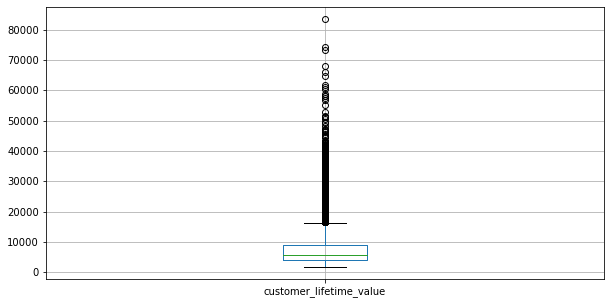

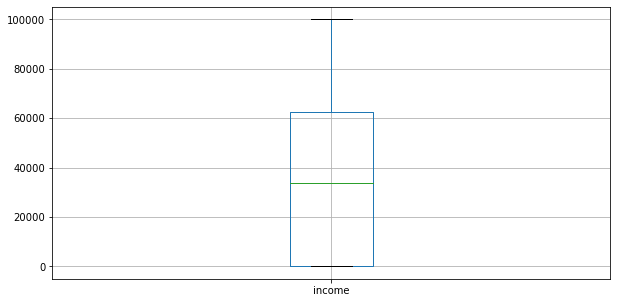

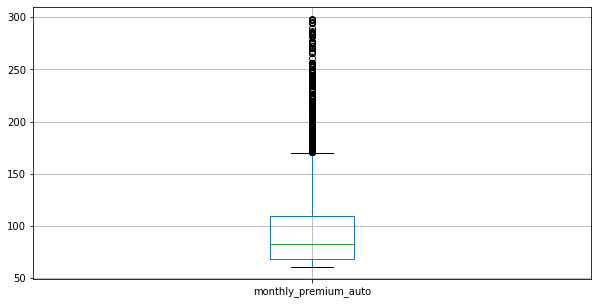

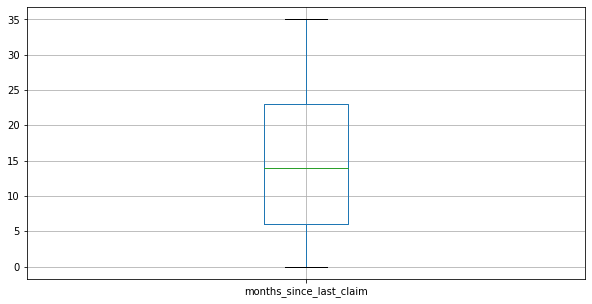

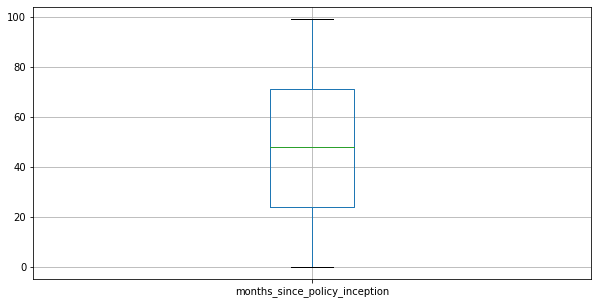

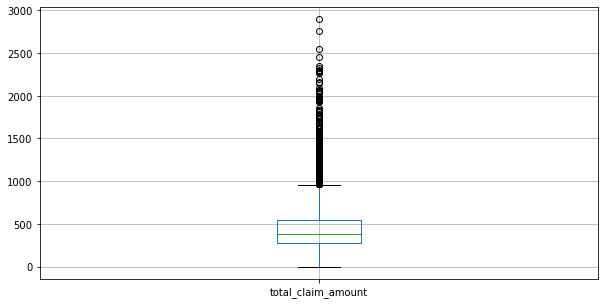

In [14]:
def plot_con(df):
    for col in df.columns:
        plt.figure(figsize=(10,5))
        df.boxplot(col)
        

        
plot_con(customer_num_con)
customer_num_con

9. Comment what you can see in the plots.



Discrete Vbles: 


number_of_open_complaints:
The majority of the observations have 0 open complaints, and then the amount of customers that have 2, 3, 4 complaints reduces consistently.


number_of_policies:
Also shows the majority of customers have only 1 policy and the numebr of customers that have 2,3... reduces as well.

Continuous variables:

customer_lifetime_value: the plot shows many outliers

income: very few outliers 

monthly_premium_aut: many outliers 

months_since_last_claim: very few outliers

months_since_policy_inception: very few outliers

total_claim_amount: many outliers 

10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)



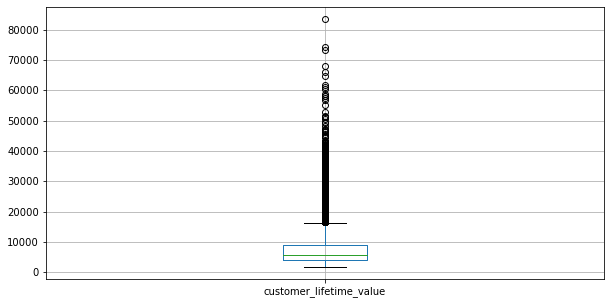

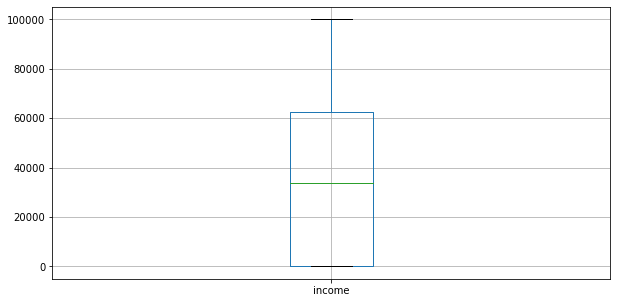

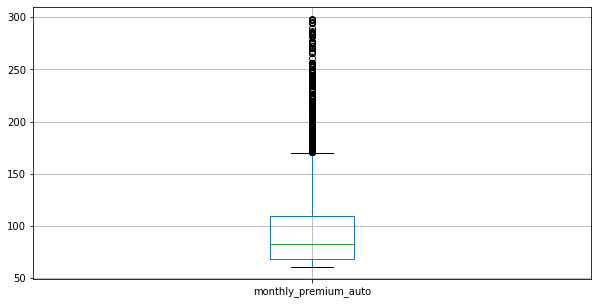

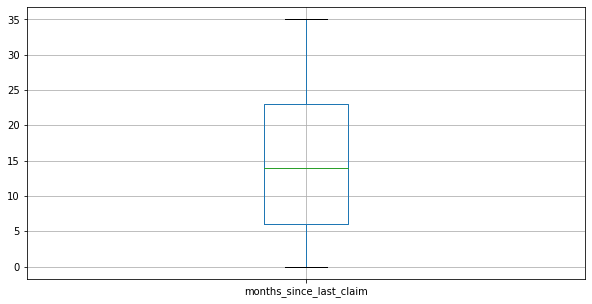

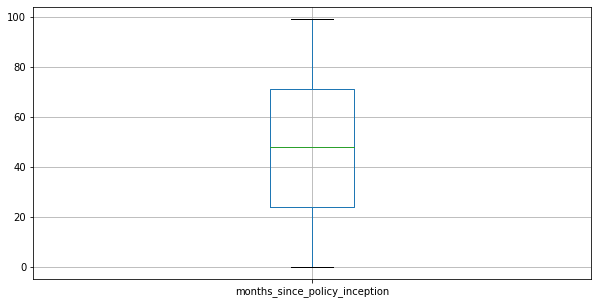

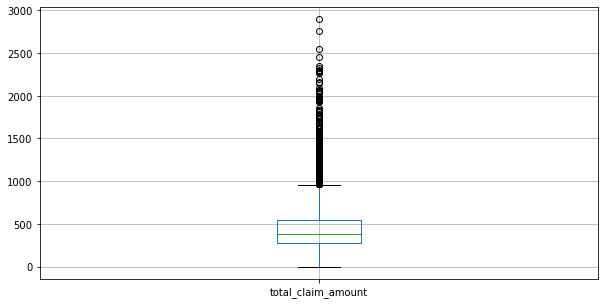

In [15]:
def plot_con(df):
    for col in df.columns:
        plt.figure(figsize=(10,5))
        df.boxplot(col)
        
#Or scatter plot 
plot_con(customer_num_con)

11. Did you find outliers?  Comment what you will do with them.



customer_lifetime_value, monthly_premium_aut, months_since_last_claim, months_since_policy_inception, 
total_claim_amount they all have many outliers and they seem relevant due to the number of them.

I would use Standard Scaler to reduce them.

12. Check all columns for NaN values.  Decide what (if anything) you will need to do with them.



In [16]:
customer_df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

## Lab | Cleaning categorical data<a class="anchor" id="second-bullet"></a>

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in `files_for_lab` folder. In this lab we will explore categorical data.


1. Import the necessary libraries if you are starting a new notebook.
Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv




2. Find  all of the categorical data.  Save it in a categorical_df variable.

In [17]:
categorical_df = customer_df.select_dtypes(include=['object'])

categorical_df.nunique()

customer            9134
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64

3. Check for NaN values.



In [18]:
categorical_df.isnull().any()

customer            False
state               False
response            False
coverage            False
education           False
employmentstatus    False
gender              False
location_code       False
marital_status      False
policy_type         False
policy              False
renew_offer_type    False
sales_channel       False
vehicle_class       False
vehicle_size        False
dtype: bool

5. Check dtypes. Do they all make sense as categorical data?



In [19]:
categorical_df

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


NO.

policy,   policy_type,  vehicle_class  and customer have stings woth numerical or just stings with 2 diff info

In [19]:
categorical_df

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [20]:
categorical_df.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

6. Does any column contain alpha and numeric data?  Decide how to clean it.



In [21]:
categorical_df['customer']

0       BU79786
1       QZ44356
2       AI49188
3       WW63253
4       HB64268
         ...   
9129    LA72316
9130    PK87824
9131    TD14365
9132    UP19263
9133    Y167826
Name: customer, Length: 9134, dtype: object

In [22]:
categorical_df['customer'].value_counts()

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64

We have checked the diff rows and they are all diff values (1 value per row) so its like a reg-number or name_id and they are all unique so makes no sense to treat them.


7. Would you choose to do anything else to clean or wrangle the categorical data?  Comment your decisions.


In [23]:
categorical_df

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


We could separate alphanumerics but they mean something together, 

And some other splits, but the comments below explain why I decide to leave them


8. Compare policy_type and policy.  What information is contained in these columns.  Can you identify what is important?  


policy conatins policy type and another data 

In [ ]:
categorical_df['policy_type'].value_counts()


In [ ]:
categorical_df['policy'].value_counts()

We can drop / delete policy_type

In [ ]:
del categorical_df['policy_type'] 
categorical_df


Now we can split policy to separate.

I have found info about L1, L2, L3 in https://link.springer.com/article/10.1057/gpp.2010.5

"In selected countries, third-party liability covers a third party inside or outside the vehicle; it covers property damage (L1) or bodily injury (L2). The coverage for bodily injury due to an intoxicated driver (L3) is included in L2. Spousal liability (L4) covers the liability of death or injury to the spouse. 


They refer to the level of coverage of the policy so we could create another column for it and separate 'policy' to policy_cover, but I dont think is pragamatic, as we can treat them as the 9 categories that appear as combination odf the 2 kind of data in policy

In [45]:
categorical_df["policy"].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64


9. Check number of unique values in each column, can they be combined in any way to ease encoding?  Comment your thoughts and make those changes.

In [33]:
categorical_df["customer"].value_counts()


BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64

In [35]:
categorical_df["state"].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

In [36]:
categorical_df["response"].value_counts()


No     7826
Yes    1308
Name: response, dtype: int64

In [37]:
categorical_df["coverage"].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

In [53]:
categorical_df["education"].value_counts()
# Here we could group in "High Scool or below" , "College", and "Graduate or higher" 

Graduate or higher      3831
College                 2681
High School or Below    2622
Name: education, dtype: int64

In [54]:
#DOESNT WORK !! ASK ON LAB REVIEW 

# categorical_df["education"] = np.where(categorical_df["education"].isin(['Bachelor','Master','Doctor']), 'Graduate or higher', categorical_df["education"])

In [27]:
categorical_df["employmentstatus"].value_counts()
#Here we could regroup in. Employed / UNEMPLOYED  and NOT ABLE TO WORK but we will lose information


# And i some of the following vbles we could also regroup to reduce the nunber oif differnet values 

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [55]:
categorical_df["gender"].value_counts()

F    4658
M    4476
Name: gender, dtype: int64

In [56]:
categorical_df["location_code"].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

In [57]:
categorical_df["marital_status"].value_counts()


Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

In [58]:
categorical_df["policy"].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [59]:
categorical_df["renew_offer_type"].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

In [60]:
categorical_df["sales_channel"].value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

In [61]:
categorical_df["vehicle_class"].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

In [62]:
categorical_df["vehicle_size"].value_counts()

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

## Lab | Cleaning numerical data <a class="anchor" id="third-bullet"></a>

1. Open the `categoricals` variable we created before.


In [67]:
categorical_df

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Graduate or higher,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Graduate or higher,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Graduate or higher,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Graduate or higher,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Graduate or higher,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Graduate or higher,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Graduate or higher,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


2. Plot all the categorical variables with the proper plot. What can you see?

<Figure size 720x360 with 0 Axes>

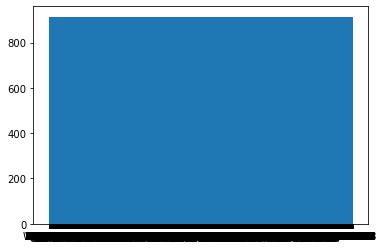

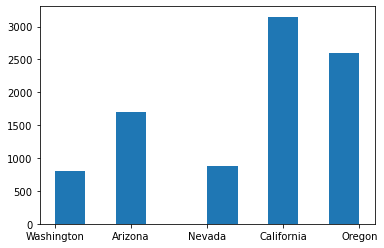

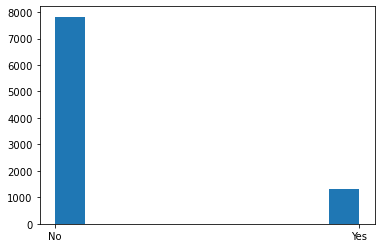

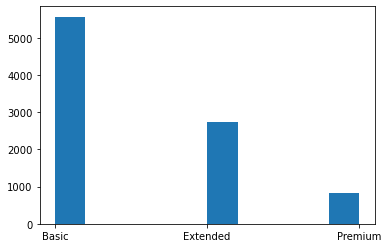

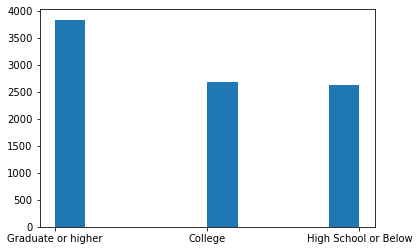

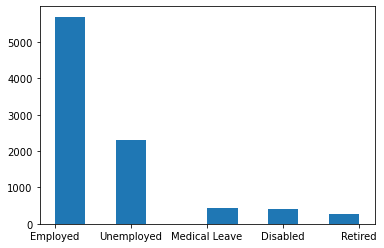

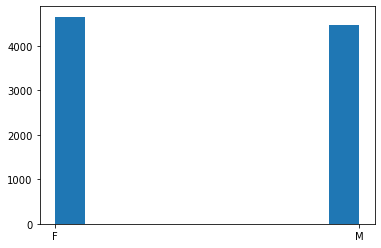

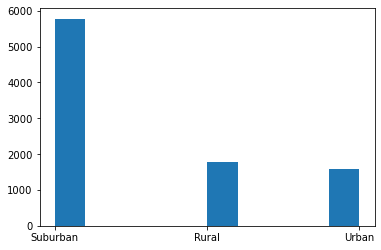

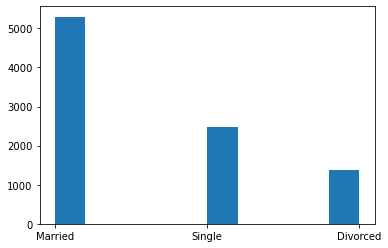

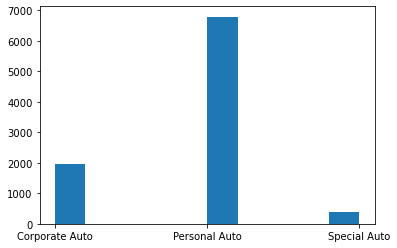

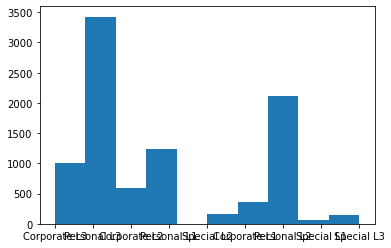

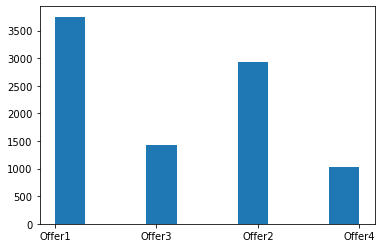

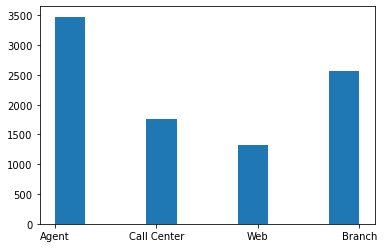

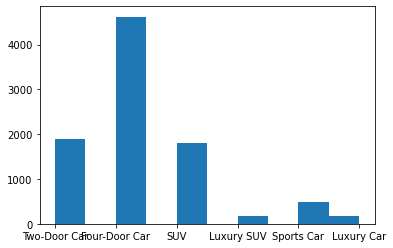

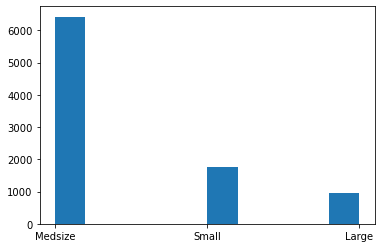

In [68]:
def plot(df):
    plt.figure(figsize=(10,5))
    for i in df.columns:
        plt.figure()
        plt.hist(df[i])
        
plot_dis(categorical_df)

3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

4. Plot time variable. Can you extract something from it?